# Shallow learning
Shallow learning for making a benchmark for unets  
random forest is good

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')
%cd gdrive/MyDrive/M_DV_V2022

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
/content/gdrive/MyDrive/M_DV_V2022


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

from sklearn.ensemble import RandomForestClassifier

# Load data

In [12]:
root = "data/u_net_roofs/"

X_train = np.load(root+"X_data.npy")
y_train = np.load(root+"y_data.npy")

X_val = np.load(root+"X_data_val.npy")
y_val = np.load(root+"y_data_val.npy")

X_test = np.load(root+"X_data_test.npy")
y_test = np.load(root+"y_data_test.npy")

In [7]:
y_train.shape

(100, 128, 128, 1)

# Make model and predict

In [47]:
rf = RandomForestClassifier()

X = X_train.reshape((X_train.shape[0]*X_train.shape[1]*X_train.shape[2], X_train.shape[3]))
y = y_train.reshape((y_train.shape[0]*y_train.shape[1]*y_train.shape[2], 1)).ravel()
rf.fit(X[:300000],y[:300000])

RandomForestClassifier()

### Predict and see results

In [48]:
X = X_test.reshape((X_test.shape[0]*X_test.shape[1]*X_test.shape[2], X_test.shape[3]))
y = y_test.reshape((y_test.shape[0]*y_test.shape[1]*y_test.shape[2], 1)).ravel()

pred = rf.predict(X)
f1 = f1_score(y,pred)
acc = accuracy_score(y,pred)

In [49]:
f1

0.6853274679361636

In [50]:
acc

0.961754150390625

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


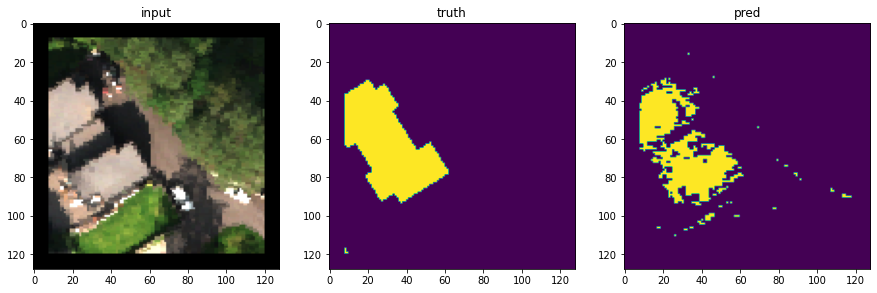

In [52]:
fig, (ax1,ax2,ax3) = plt.subplots(nrows=1, ncols=3, figsize=(15,15))
ax3.imshow(pred.reshape((50, 128,128))[3]); ax1.set_title("input")
ax2.imshow(y_test[3][:,:,0]); ax2.set_title("truth")
ax1.imshow(np.dstack([X_test[3,:,:,76], X_test[3,:,:,41], X_test[3,:,:,21]])/100); ax3.set_title("pred")

plt.show()